# Feature Engineering Case Study

## 1. Import Libraries and Load Data
- Import necessary libraries
- Load the dataset

## 2. Section-1 : Imputing Missing Values, Encoding, Train-Test Split
### 2.1 Imputing Missing Values
- Identify missing values
- Choose imputation strategy
- Impute missing values
### 2.2 Encoding
- Encode categorical variables
### 2.3 Train-Test Split
- Split data into training and testing sets

## 3. Section-2 : Data Imbalance, Feature Transformation & Scaling, Removing Outliers
### 3.1 Data Imbalance
- Check class distribution
- Handle data imbalance if present
### 3.2 Feature Transformation & Scaling
- Perform feature transformations if necessary
- Scale features using appropriate methods
### 3.3 Removing Outliers
- Identify and remove outliers from the dataset

## 4. Feature Engineering and Preprocessing
- Perform additional feature engineering steps if required
- Preprocess the data for modeling

## 5. Modeling
- Choose appropriate machine learning models
- Train the models on the training data
- Evaluate model performance on the testing data

## 6. Conclusion
- Summarize findings
- Discuss any challenges faced and potential improvements

## 7. References
- List any references used in the case study


# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import zipfile
%matplotlib inline

## Open the ZipFile

In [2]:
# import zipfile
# with zipfile.ZipFile('Stuff.zip', 'r') as zip_ref:
#     zip_ref.extractall()

## Load the Dataset

In [3]:
df=pd.read_excel('Telco_customer_churn.xlsx')
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


### Cardinality(Unique values in a relational table column)

In [4]:
df.nunique()#counting the unique values in each column

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

### Checking for missing Values

In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### As,Total Charges is a string,we need to convert it to numeric column

In [6]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce') #converting the column to numeric
print(df['Total Charges'].isnull().sum())

11


### Identifying the missing values

In [7]:
df[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


### Really High Correlation between Monthly Charges* Tenure Months and the  Total Charges

In [8]:
df['Monthly Charges*Tenure Months'] = df['Monthly Charges'] * df['Tenure Months']
df[['Monthly Charges*Tenure Months', 'Total Charges']].corr()

,Monthly Charges*Tenure Months,Total Charges
Monthly Charges*Tenure Months,1.00000,0.99956
Total Charges,0.99956,1.00000


In [9]:
## Plots for Categorical Variables and Numerical Variables

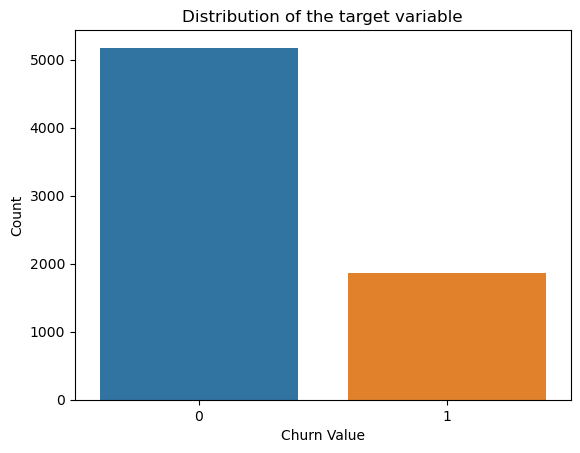

In [168]:
#Checking the distribution of the target variable(Churn Value/Churn Label)
sns.countplot(data=df,x='Churn Value')
plt.title('Distribution of the target variable')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.show()

In [169]:

#dont include City
#Checking the distribution of the categorical columns
cat_cols=['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Churn Label']

#replace the yes no with 1 and 0 in cat cols
df[cat_cols] = df[cat_cols].replace({'Yes': 1, 'No': 0})
#Checking the unique values in the categorical columns
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('\n')

Gender
Gender
Male      3555
Female    3488
Name: count, dtype: int64


Senior Citizen
Senior Citizen
0    5901
1    1142
Name: count, dtype: int64


Partner
Partner
0    3641
1    3402
Name: count, dtype: int64


Dependents
Dependents
0    5416
1    1627
Name: count, dtype: int64


Phone Service
Phone Service
1    6361
0     682
Name: count, dtype: int64


Multiple Lines
Multiple Lines
0                   3390
1                   2971
No phone service     682
Name: count, dtype: int64


Internet Service
Internet Service
Fiber optic    3096
DSL            2421
0              1526
Name: count, dtype: int64


Online Security
Online Security
0                      3498
1                      2019
No internet service    1526
Name: count, dtype: int64


Online Backup
Online Backup
0                      3088
1                      2429
No internet service    1526
Name: count, dtype: int64


Device Protection
Device Protection
0                      3095
1                      2422
No intern

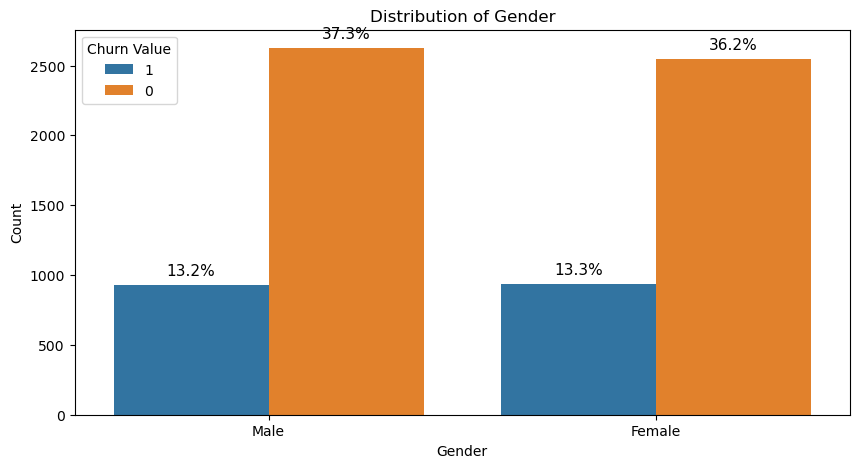

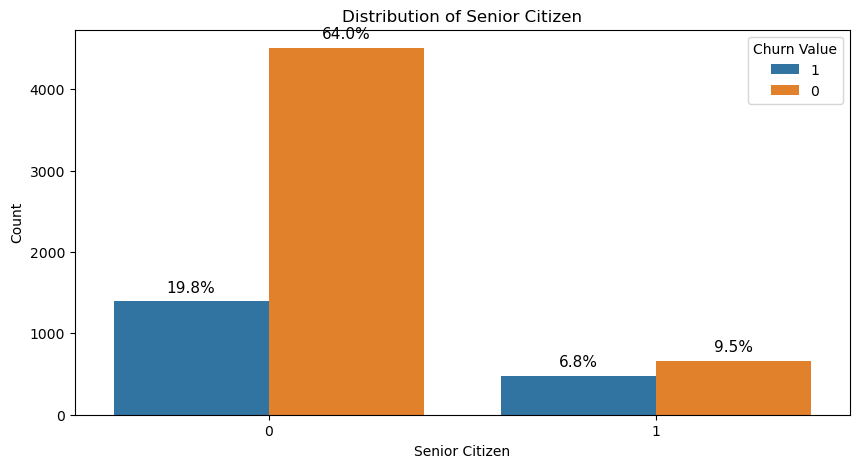

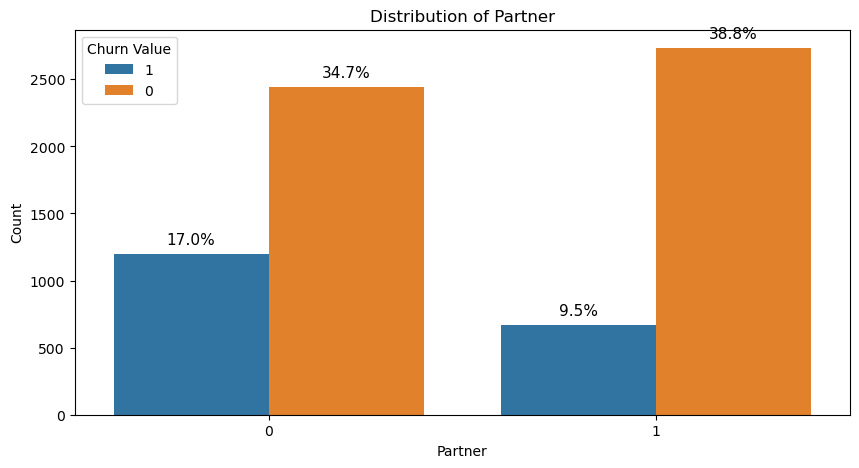

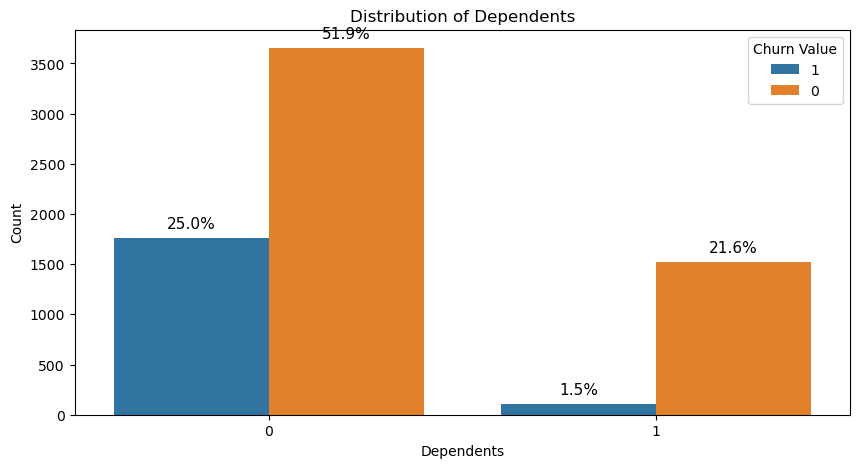

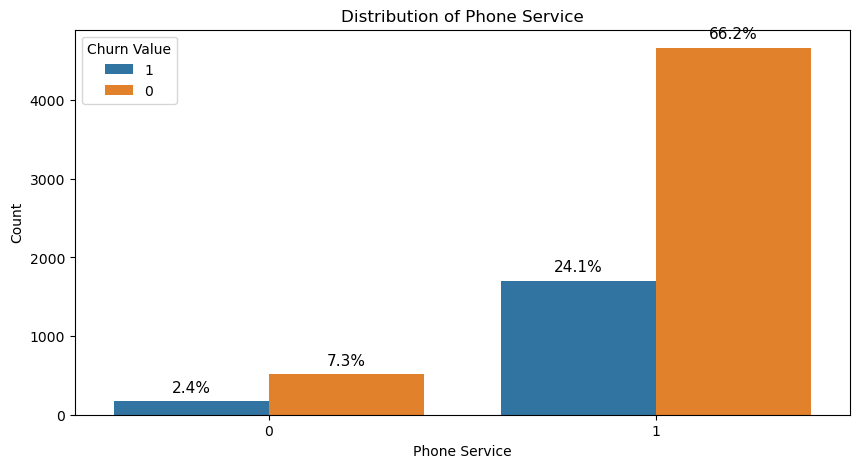

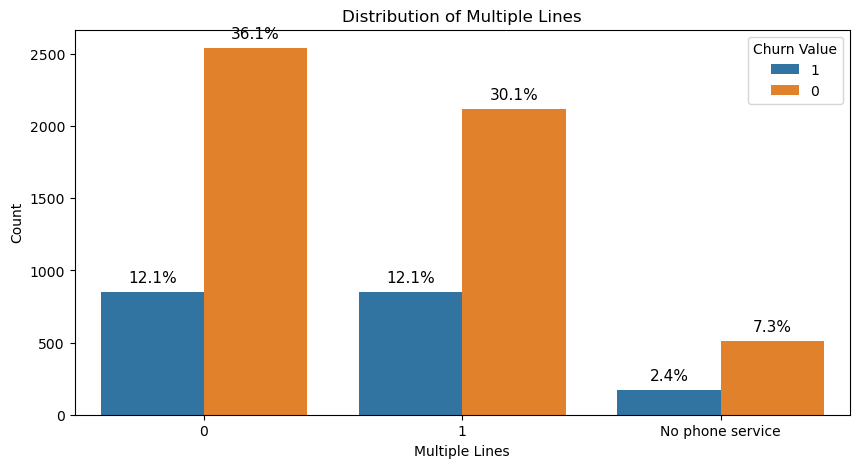

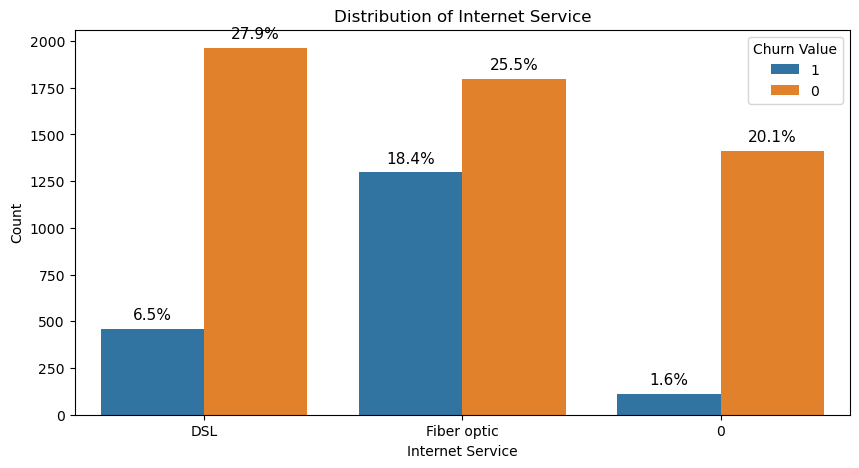

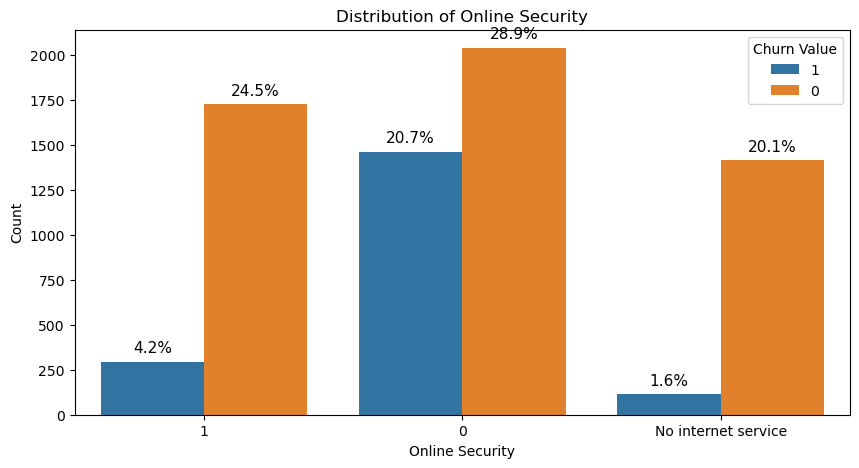

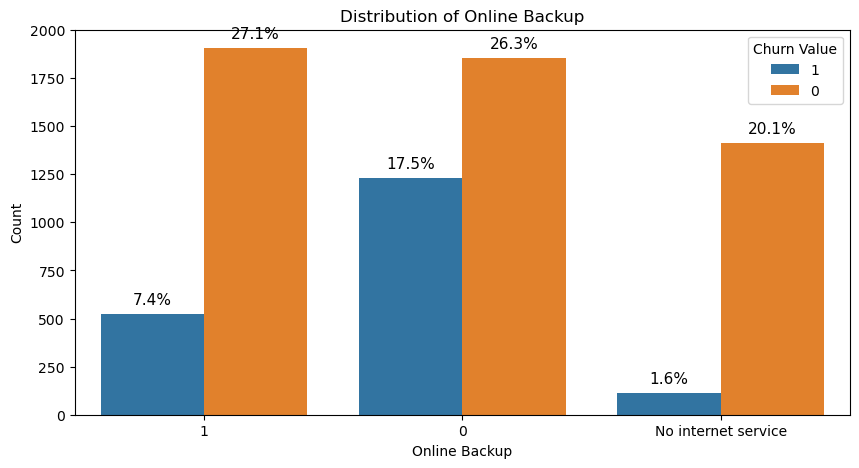

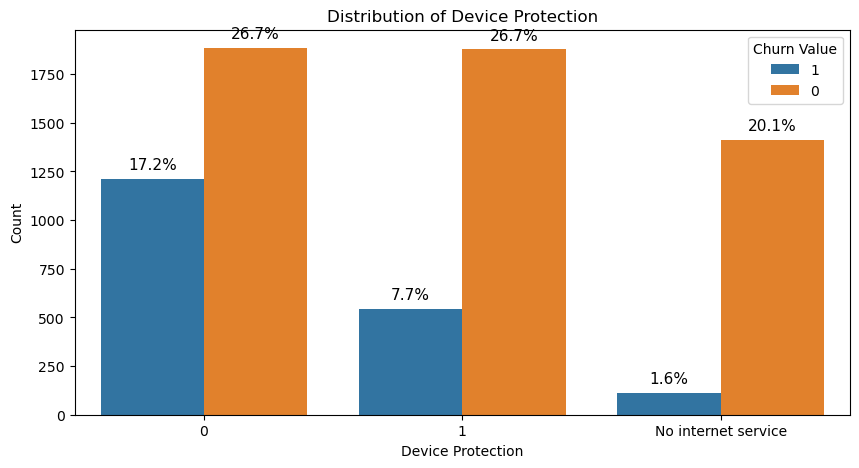

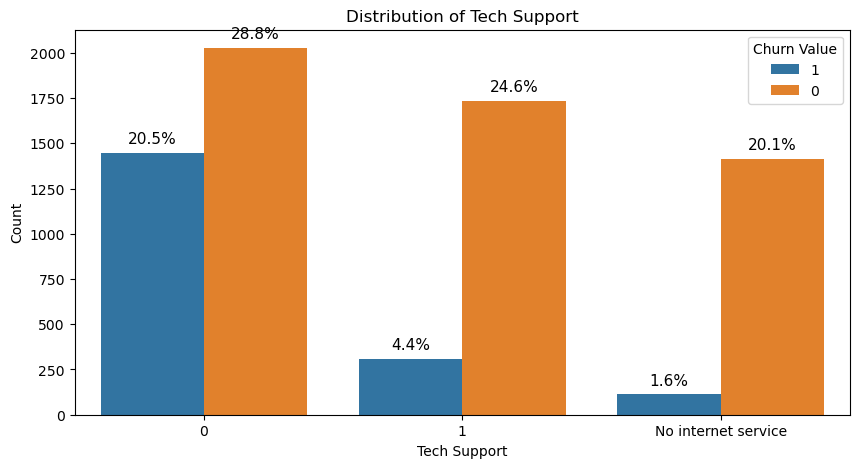

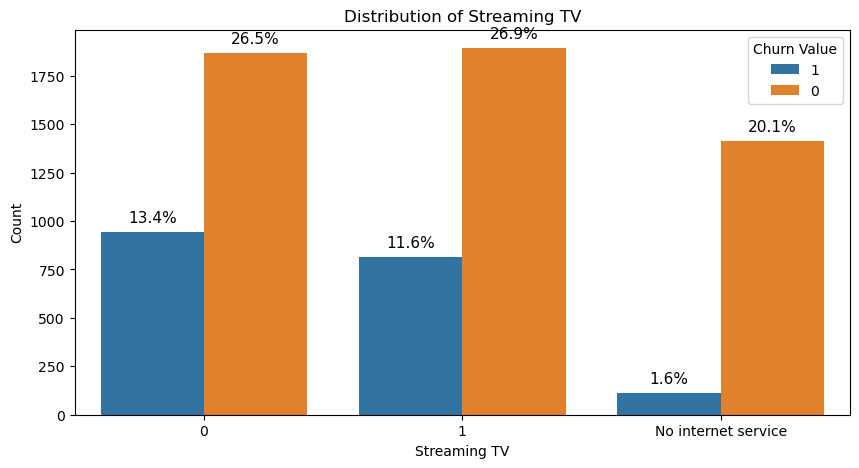

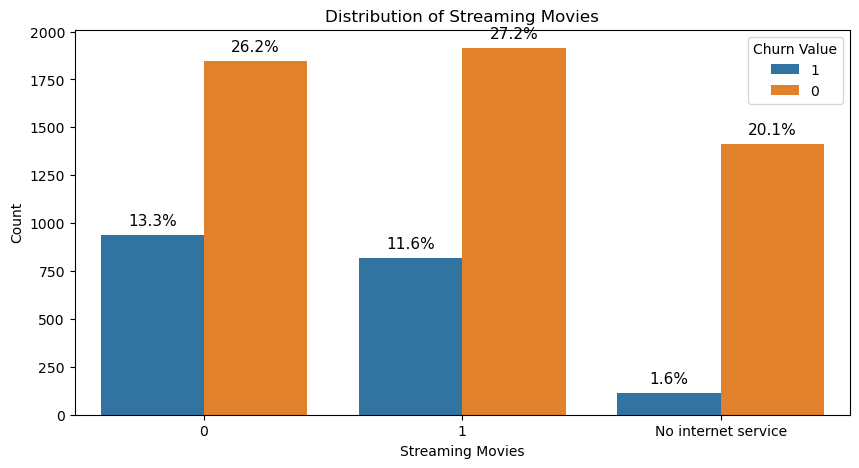

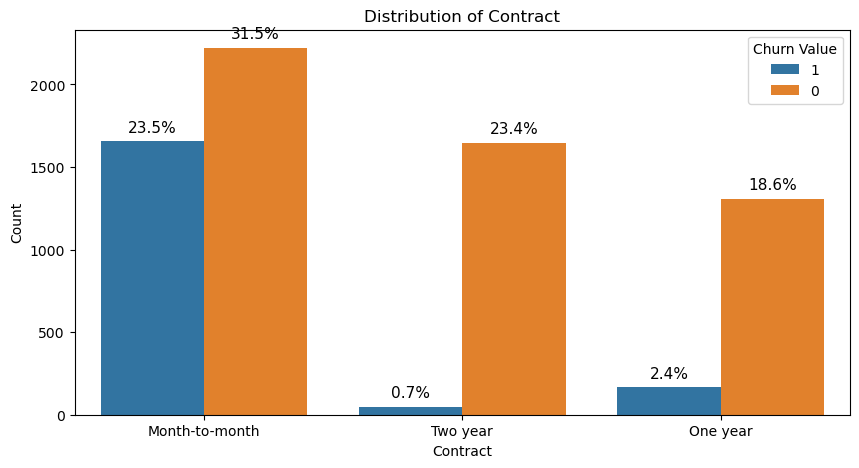

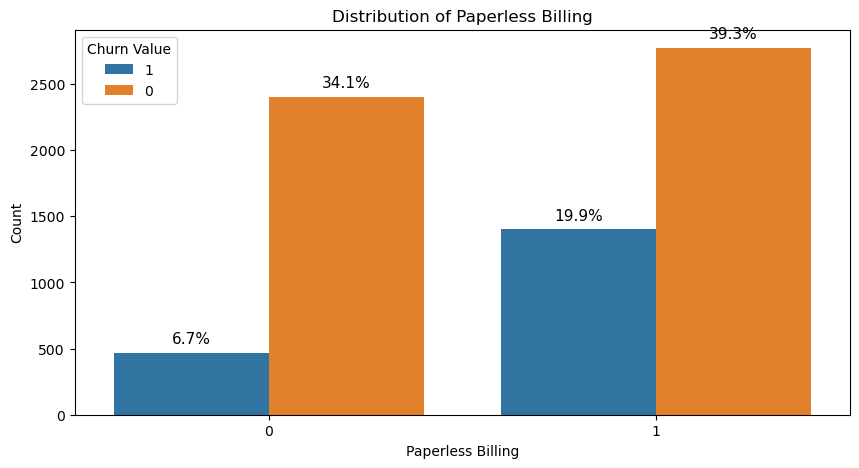

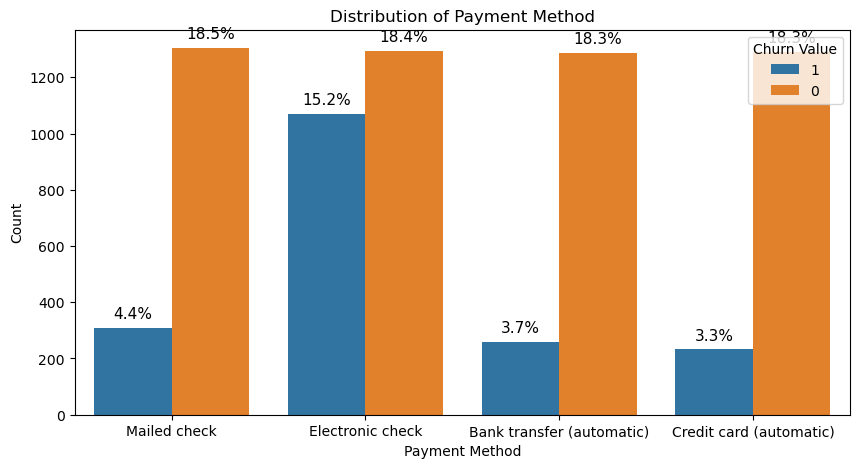

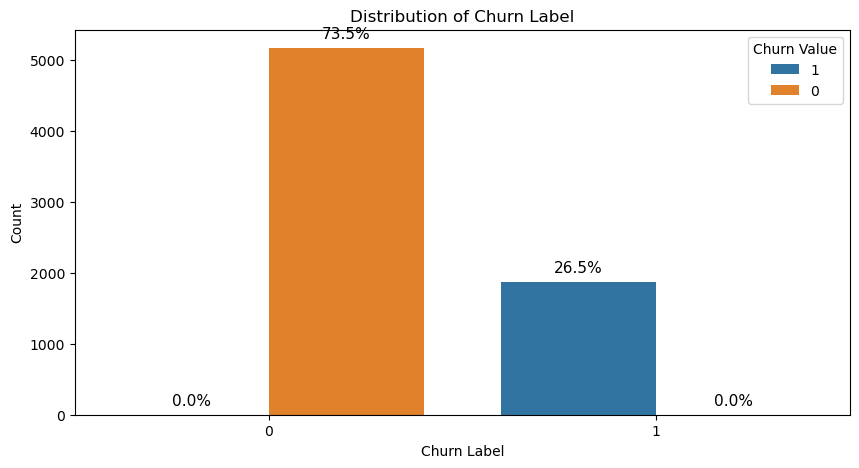

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    

    df['Churn Value'] = df['Churn Value'].astype(str)
    
    ax = sns.countplot(data=df, x=col, hue='Churn Value')
    
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
    
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


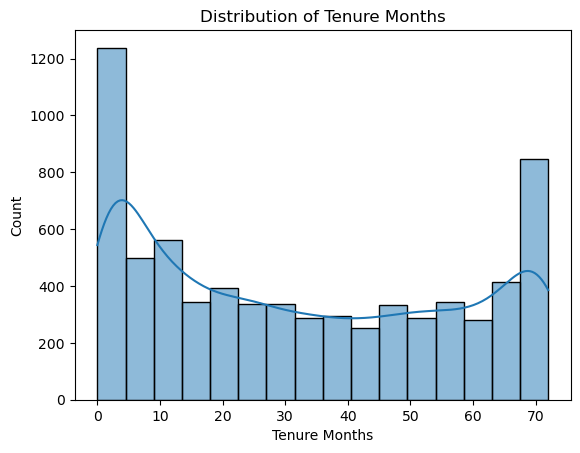

In [170]:
#plotting the histogram for the numerical columns with the distribution of the data
sns.histplot(data=df,x='Tenure Months',kde=True)
plt.title('Distribution of Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Count')
plt.show()

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


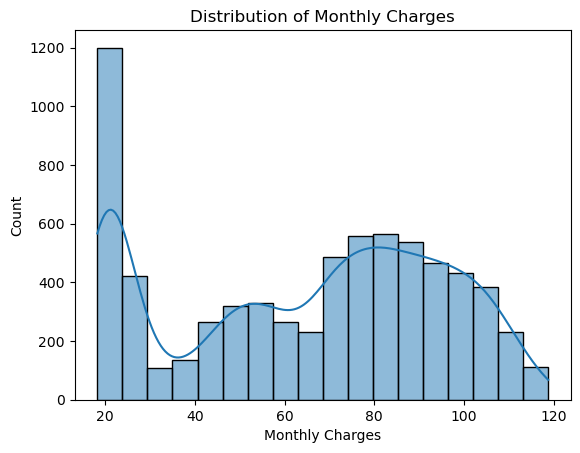

In [171]:
#plotting the histogram for the numerical columns with the distribution of the data
sns.histplot(data=df,x='Monthly Charges',kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


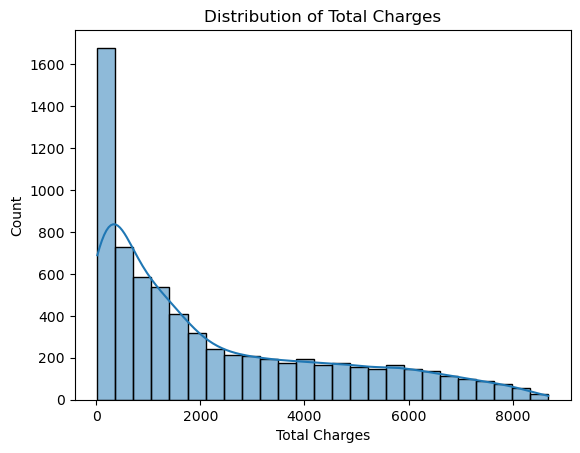

In [172]:
#plotting the histogram for the numerical columns with the distribution of the data
sns.histplot(data=df,x='Total Charges',kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


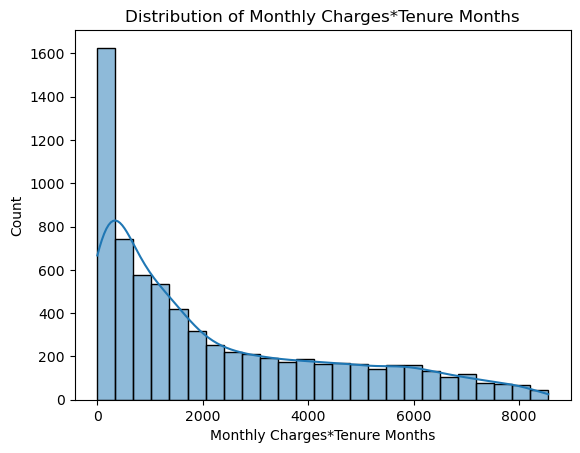

In [154]:
#plotting the histogram for the numerical columns with the distribution of the data
sns.histplot(data=df,x='Monthly Charges*Tenure Months',kde=True)
plt.title('Distribution of Monthly Charges*Tenure Months')
plt.xlabel('Monthly Charges*Tenure Months')
plt.ylabel('Count')
plt.show()

## Section-1

## 2.1 Imputation

- Total Charges is highly correlated with Monthly Charges and Tenure Months. We can impute Total Charges by multiplying Monthly Charges and Tenure Months.

- Other methods, such as {KNN imputation, MICE imputation,etc.} can also be used to impute Total Charges.But, as the correlation is very high, I will use the above method.Also KNN imputation is not suitable for this dataset as it is a small dataset and it may decrease the performance of the model.

- Therefore, we will use the method I mentioned at the very start to impute Total Charges.


In [10]:
#REPLACE MISSING VALUES WITH THE PRODUCT OF MONTHLY CHARGES AND TENURE MONTHS
df['Total Charges'] = df['Total Charges'].fillna(df['Monthly Charges*Tenure Months'])

### Successfully imputed the missing values

In [11]:
df['Total Charges'].isnull().sum()

0

## 2.2 Encoding

we tried our model for:
- Combination of  One Hot Encoding and Label Encoding on our dataset.
- One Hot Encoding only.
- Label Encoding only.

From all the above methods, Label Encoding only method gives the best results.

In [157]:
df_encoded

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Customer_id
0,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,1,...,0,0,0,0,1,3,53.85,108.15,1,2564
1,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,0,1,2,70.70,151.65,1,6511
2,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,1,...,0,2,2,0,1,2,99.65,820.50,1,6551
3,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,1,...,2,2,2,0,1,2,104.80,3046.05,1,5604
4,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,1,...,0,2,2,0,1,0,103.70,5036.30,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,0,0,0,0,72,1,...,1,1,1,2,1,0,21.15,1419.40,0,1758
7039,Adelanto,92301,34.667815,-117.536183,1,0,1,1,24,1,...,2,2,2,1,1,3,84.80,1990.50,0,4853
7040,Amboy,92304,34.559882,-115.637164,0,0,1,1,72,1,...,0,2,2,1,1,1,103.20,7362.90,0,1525
7041,Angelus Oaks,92305,34.167800,-116.864330,0,0,1,1,11,0,...,0,0,0,0,1,2,29.60,346.45,0,3367


## 

In [12]:
# Importing the label encoder and train test split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df_encoded = df
# List of columns on which label encoding is to be applied
encoded = ["Phone Service","Multiple Lines","Internet Service","Streaming TV", "Online Security","Online Backup","Device Protection", "Tech Support", "Streaming Movies", "Contract","Paperless Billing","Payment Method","Payment Method", 'Gender', 'Senior Citizen','Partner','Dependents','Paperless Billing']
# Encoding the columns
for encoding in encoded:
    df_encoded[encoding] = le.fit_transform(df_encoded[encoding])
df_encoded

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Monthly Charges*Tenure Months
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,1,3,53.85,108.15,Yes,1,86,3239,Competitor made better offer,107.7
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,1,2,70.70,151.65,Yes,1,67,2701,Moved,141.4
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,1,2,99.65,820.50,Yes,1,86,5372,Moved,797.2
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,1,2,104.80,3046.05,Yes,1,84,5003,Moved,2934.4
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,1,0,103.70,5036.30,Yes,1,89,5340,Competitor had better devices,5081.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,1,0,21.15,1419.40,No,0,45,5306,NaN,1522.8
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,...,1,3,84.80,1990.50,No,0,59,2140,NaN,2035.2
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,1,1,103.20,7362.90,No,0,71,5560,NaN,7430.4
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,0,...,1,2,29.60,346.45,No,0,59,2793,NaN,325.6


In [13]:
# Dropping the unwanted columns 
drops_features = ['Count','Country','State','Lat Long','Churn Score','CLTV','Churn Reason','Monthly Charges*Tenure Months','Churn Label']
df_encoded = df_encoded.drop(drops_features, axis = 1)
df_encoded

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,...,0,0,0,0,0,1,2,70.70,151.65,1
2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,...,2,0,2,2,0,1,2,99.65,820.50,1
3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,...,2,2,2,2,0,1,2,104.80,3046.05,1
4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,...,2,0,2,2,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,34.341737,-116.539416,0,0,0,0,72,...,1,1,1,1,2,1,0,21.15,1419.40,0
7039,6840-RESVB,Adelanto,92301,34.667815,-117.536183,1,0,1,1,24,...,2,2,2,2,1,1,3,84.80,1990.50,0
7040,2234-XADUH,Amboy,92304,34.559882,-115.637164,0,0,1,1,72,...,2,0,2,2,1,1,1,103.20,7362.90,0
7041,4801-JZAZL,Angelus Oaks,92305,34.167800,-116.864330,0,0,1,1,11,...,0,0,0,0,0,1,2,29.60,346.45,0


### Applying Transformations like Log,Arcsin,Square Root,Cube Root and also applied Box-Cox(resuts were not satisfactory) to the numerical columns to adjust their distribution for efficient scaling.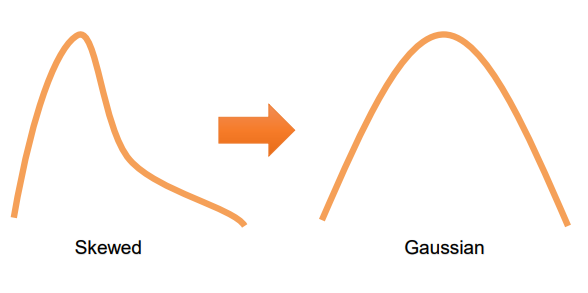

In [14]:
#Skewness of the numerical columns
df_encoded[['Monthly Charges','Tenure Months','Total Charges']].skew()

Monthly Charges   -0.220524
Tenure Months      0.239540
Total Charges      0.963235
dtype: float64

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\U

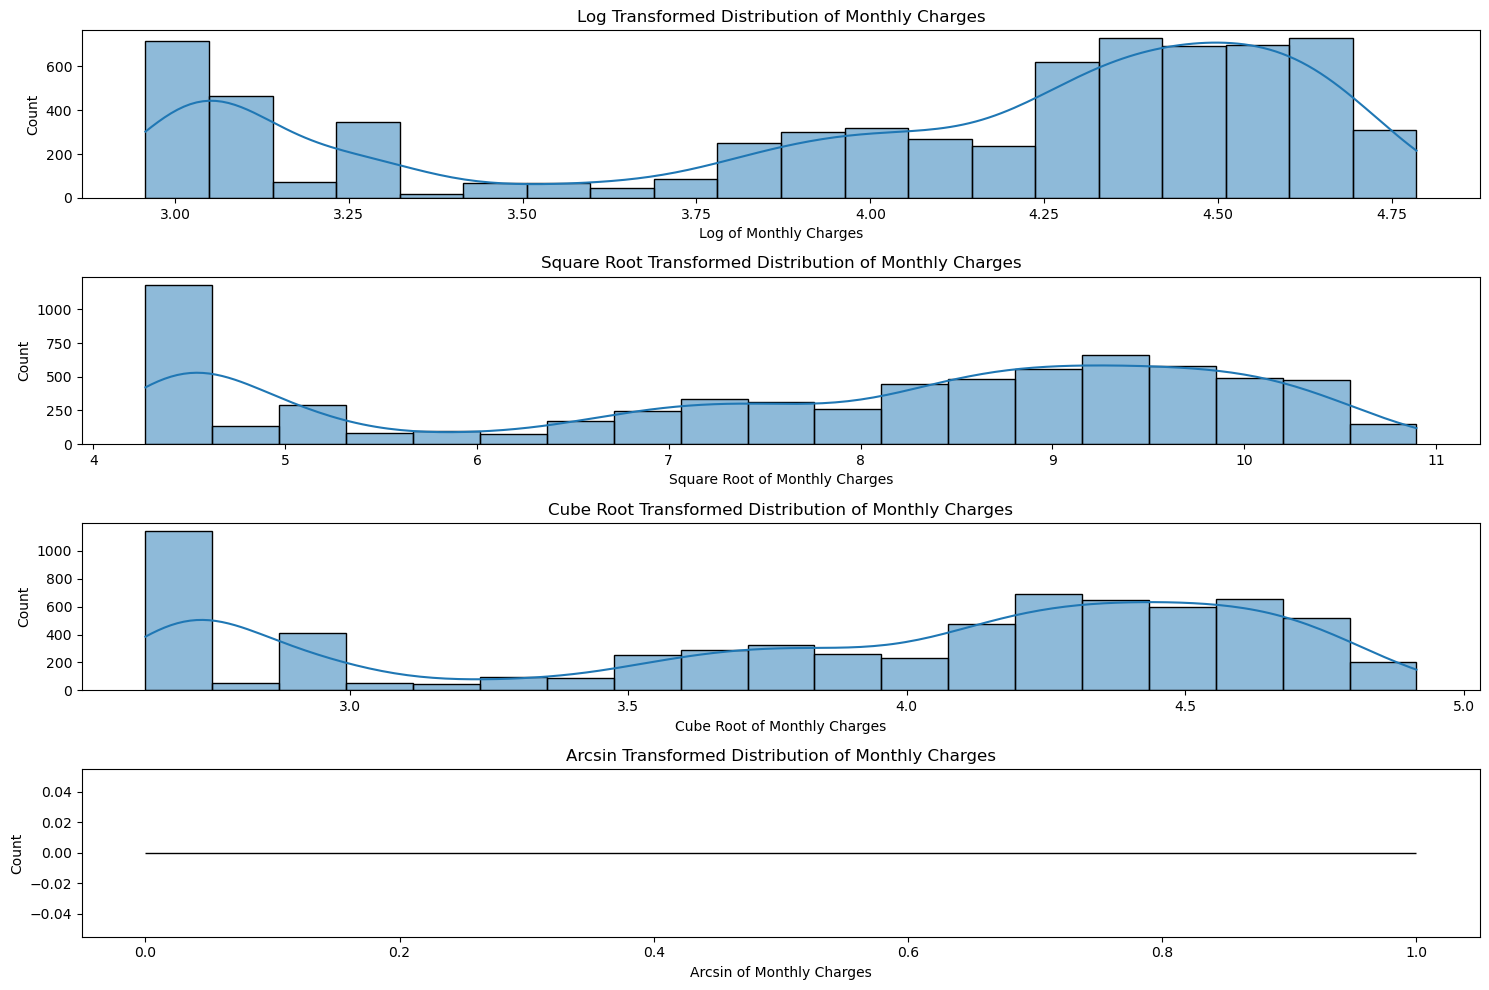

Skewness of Log transformed Monthly Charges: -0.7190167330394874
Skewness of Square Root transformed Monthly Charges: -0.48455701260718537
Skewness of Cube Root transformed Monthly Charges: -0.5690873790741925
Skewness of Arcsin transformed Monthly Charges: nan




c:\Users\ImaadHasan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\U

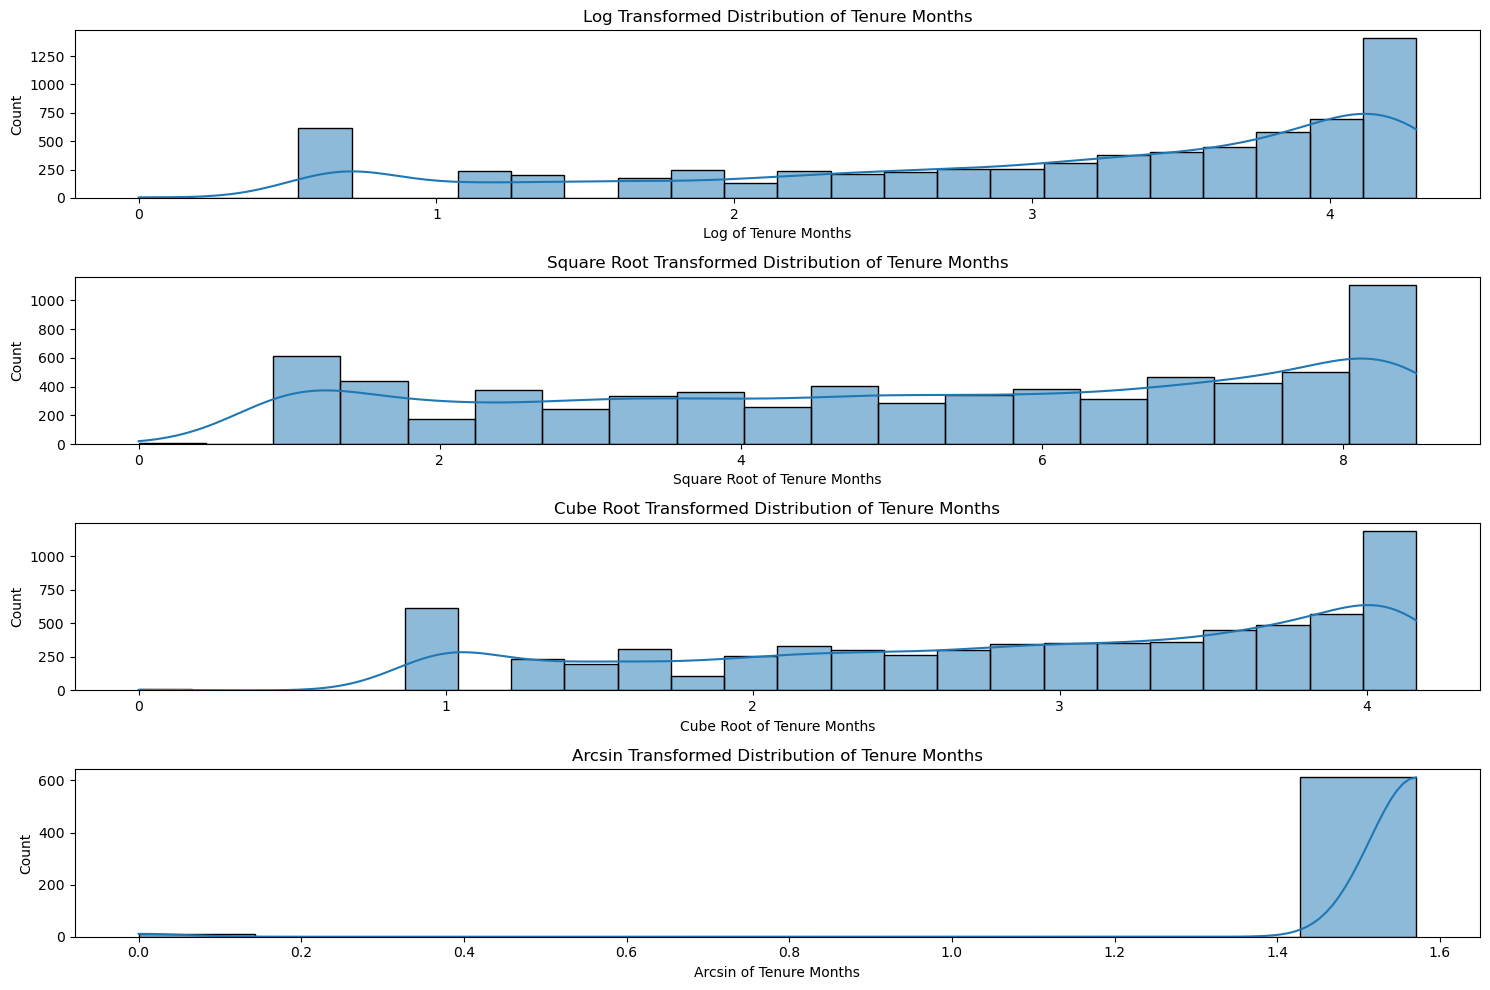

Skewness of Log transformed Tenure Months: -0.7783697457736012
Skewness of Square Root transformed Tenure Months: -0.23599910007907618
Skewness of Cube Root transformed Tenure Months: -0.45965225912141267
Skewness of Arcsin transformed Tenure Months: -7.348790131974784




c:\Users\ImaadHasan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\U

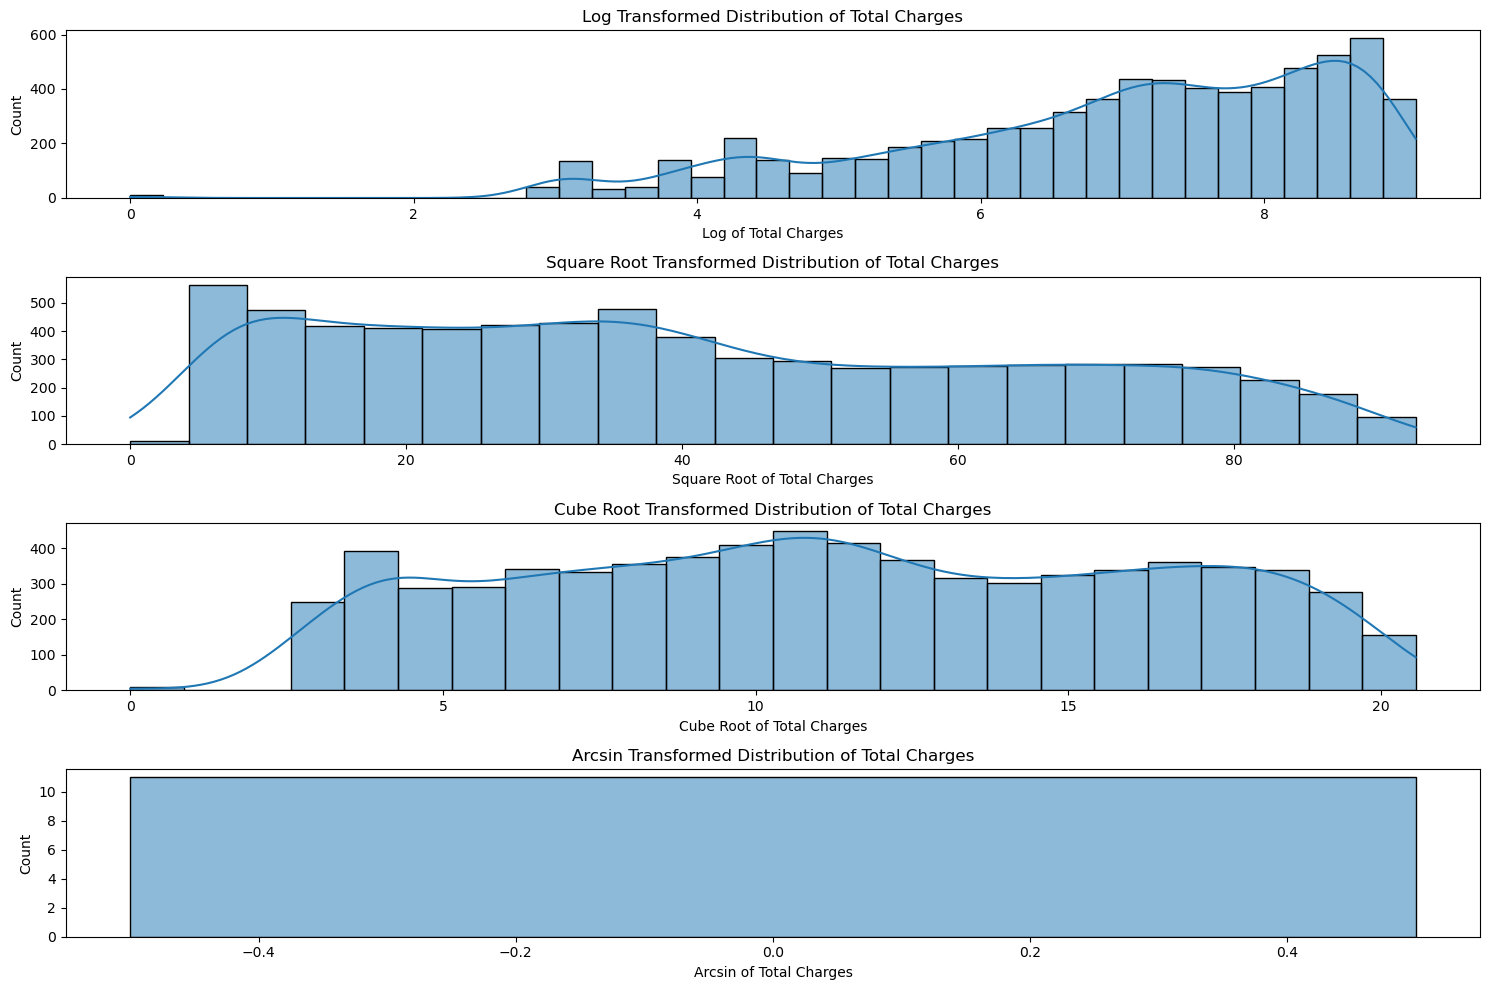

Skewness of Log transformed Total Charges: -0.8244577693814903
Skewness of Square Root transformed Total Charges: 0.307720149020609
Skewness of Cube Root transformed Total Charges: 0.004239825749038092
Skewness of Arcsin transformed Total Charges: 0.0




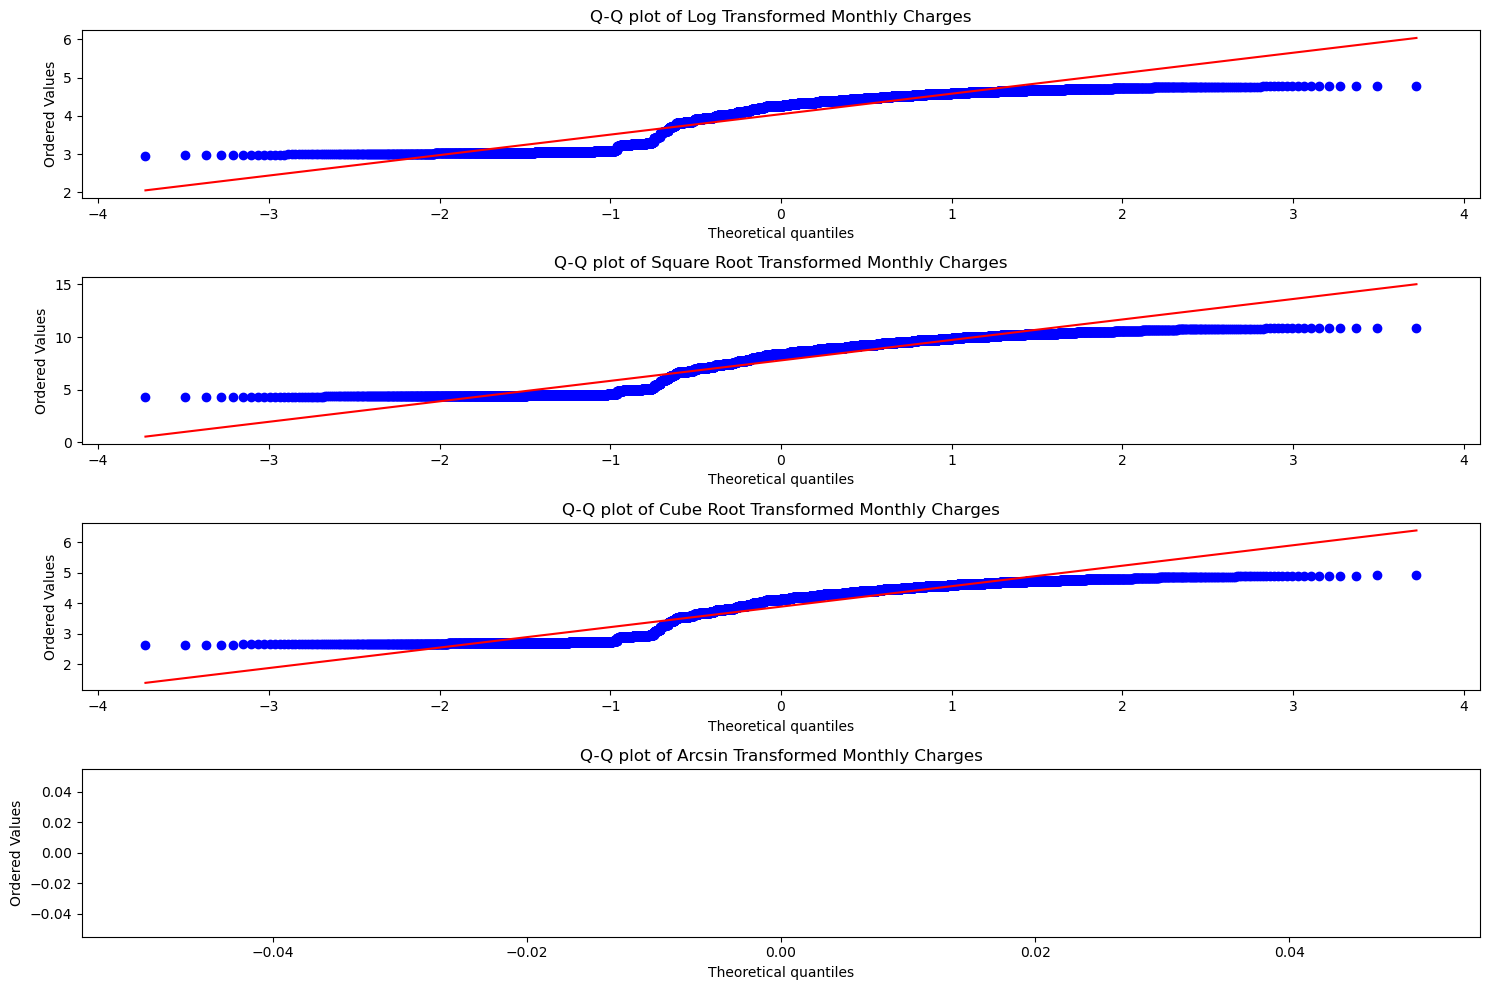

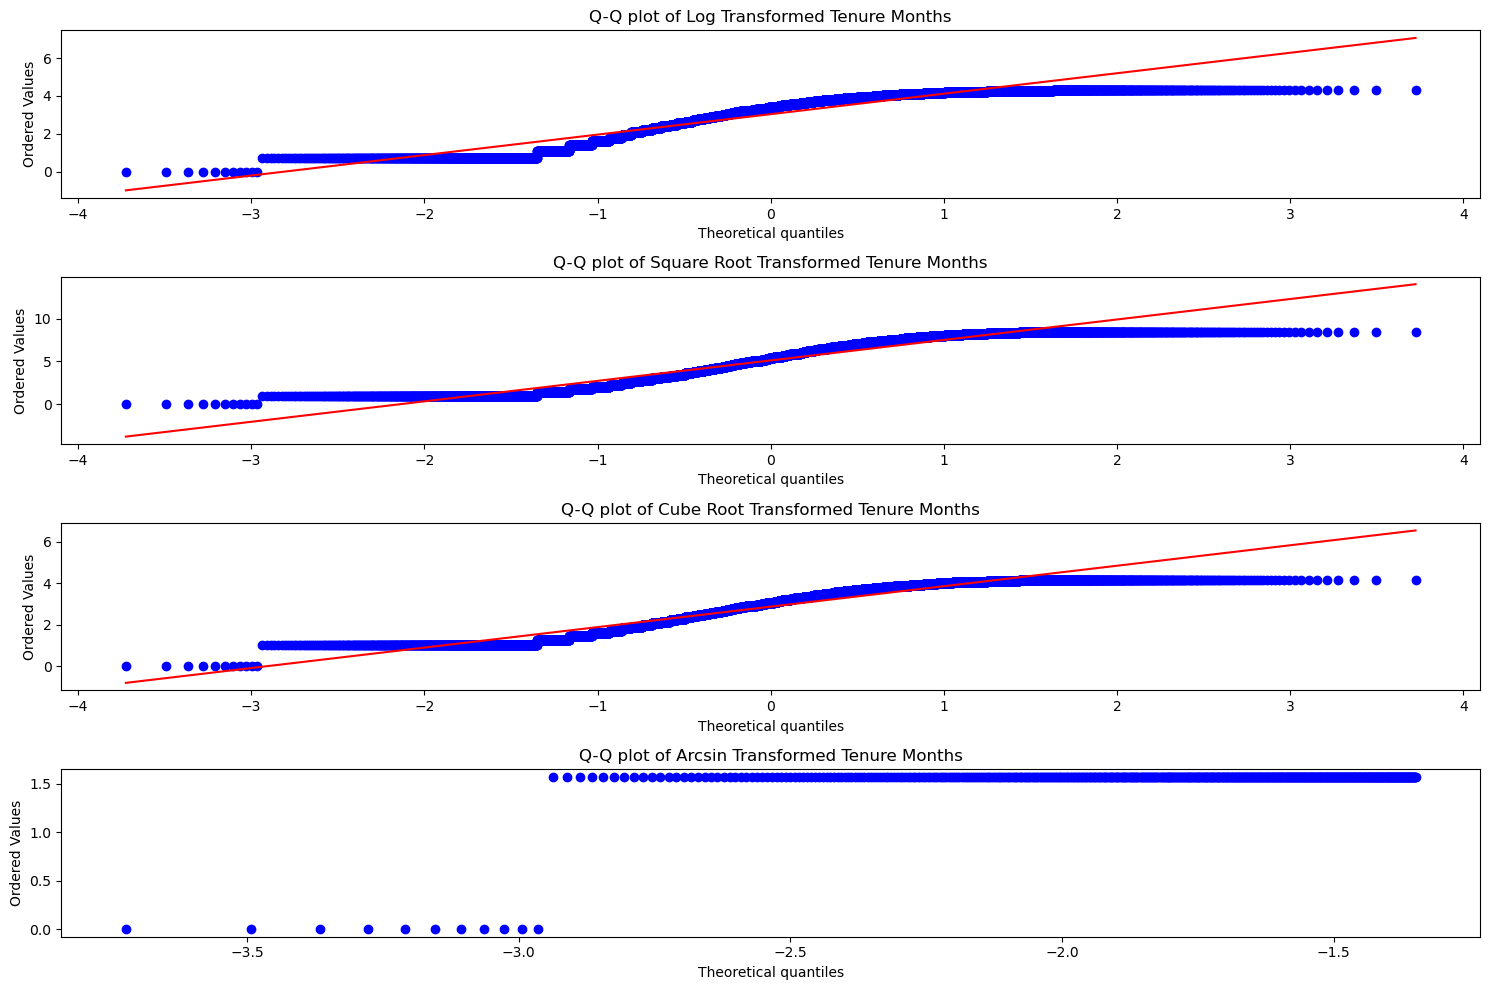

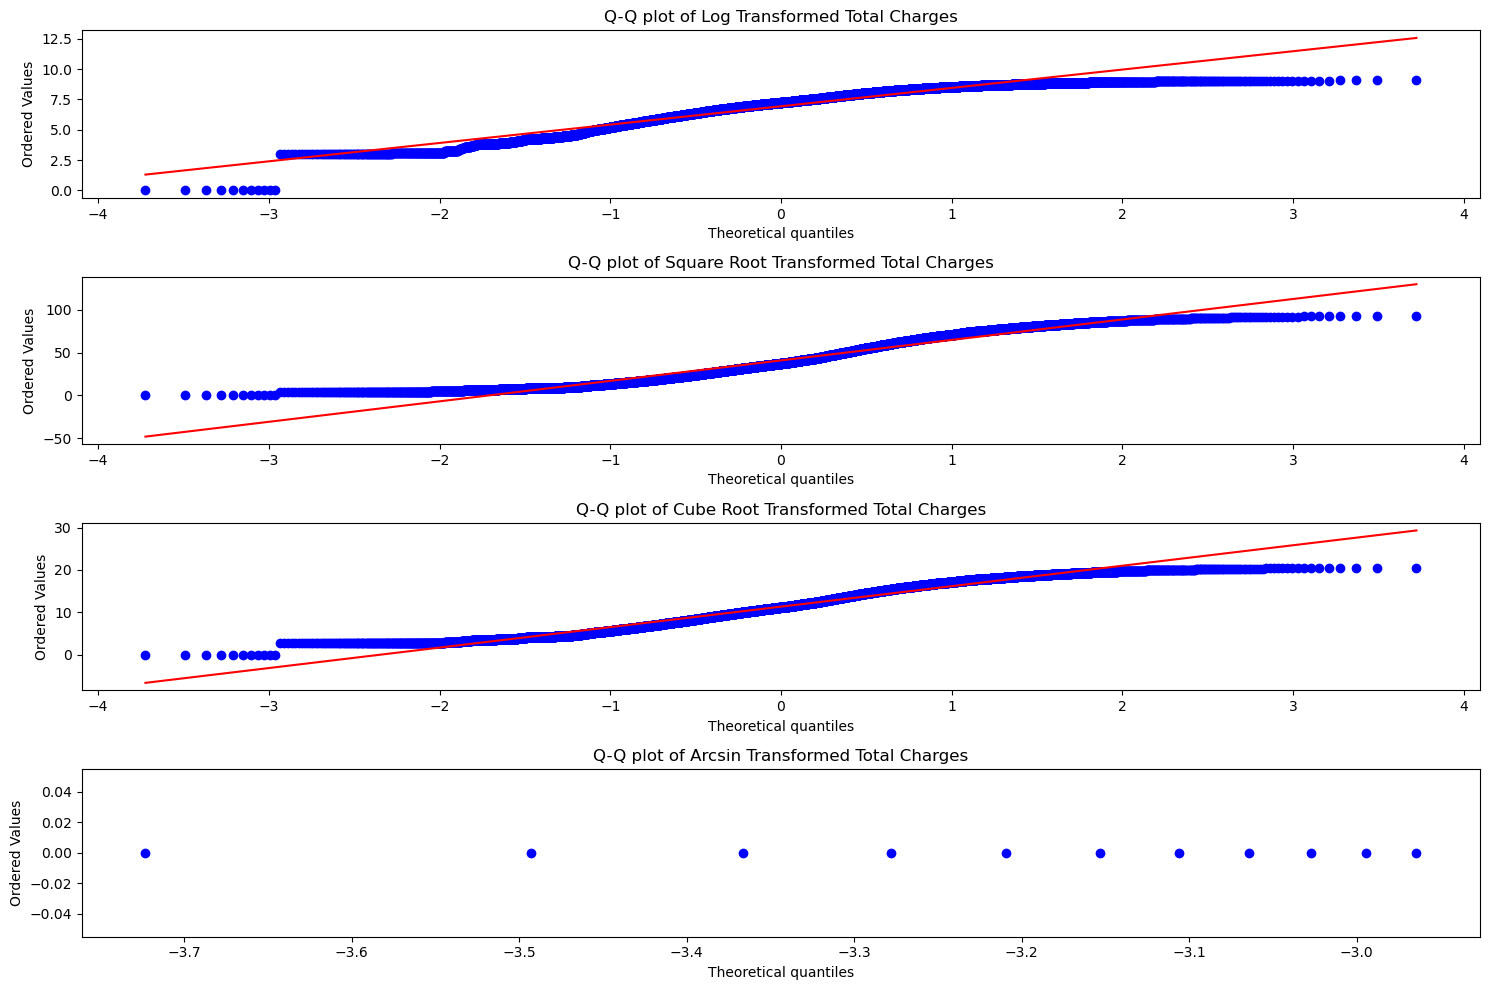

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define columns to transform
columns_to_transform = ['Monthly Charges', 'Tenure Months', 'Total Charges']

# Apply log, sqrt, and cbrt transformations and plot
for col in columns_to_transform:
    # Log transformation
    df_encoded[f'{col} Log'] = np.log1p(df_encoded[col])
    # Square root transformation
    df_encoded[f'{col} SQRT'] = np.sqrt(df_encoded[col])
    # Cube root transformation
    df_encoded[f'{col} CUBERT'] = np.cbrt(df_encoded[col])
    # Arcsin transformation
    df_encoded[f'{col} ARCSIN'] = np.arcsin(df_encoded[col])
    
    #Box-Cox transformation
    # df_encoded[f'{col} BoxCox']= stats.boxcox(df_encoded[col]+ 22)[0]
    # Plot the histograms
    plt.figure(figsize=(15, 10))
    
    plt.subplot(4, 1, 1)
    sns.histplot(df_encoded[f'{col} Log'], kde=True)
    plt.title(f'Log Transformed Distribution of {col}')
    plt.xlabel(f'Log of {col}')
    
    plt.subplot(4, 1, 2)
    sns.histplot(df_encoded[f'{col} SQRT'], kde=True)
    plt.title(f'Square Root Transformed Distribution of {col}')
    plt.xlabel(f'Square Root of {col}')
    
    plt.subplot(4, 1, 3)
    sns.histplot(df_encoded[f'{col} CUBERT'], kde=True)
    plt.title(f'Cube Root Transformed Distribution of {col}')
    plt.xlabel(f'Cube Root of {col}')
    
    plt.subplot(4, 1, 4)
    sns.histplot(df_encoded[f'{col} ARCSIN'], kde=True)
    plt.title(f'Arcsin Transformed Distribution of {col}')
    plt.xlabel(f'Arcsin of {col}')
    
    
    plt.tight_layout()
    plt.show()
    
    # Check the skewness of the transformed columns
    print(f"Skewness of Log transformed {col}: {df_encoded[f'{col} Log'].skew()}")
    print(f"Skewness of Square Root transformed {col}: {df_encoded[f'{col} SQRT'].skew()}")
    print(f"Skewness of Cube Root transformed {col}: {df_encoded[f'{col} CUBERT'].skew()}")
    print(f"Skewness of Arcsin transformed {col}: {df_encoded[f'{col} ARCSIN'].skew()}")
    # print(f"Skewness of Box-Cox transformed {col}: {df_encoded[f'{col} BoxCox'].skew()}")
    print("\n")
# Q-Q plots for the transformed columns
for col in columns_to_transform:
    plt.figure(figsize=(15, 10))
    
    plt.subplot(4, 1, 1)
    stats.probplot(df_encoded[f'{col} Log'], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of Log Transformed {col}')
    
    plt.subplot(4, 1, 2)
    stats.probplot(df_encoded[f'{col} SQRT'], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of Square Root Transformed {col}')
    
    plt.subplot(4, 1, 3)
    stats.probplot(df_encoded[f'{col} CUBERT'], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of Cube Root Transformed {col}')
    
    plt.subplot(4, 1, 4)
    stats.probplot(df_encoded[f'{col} ARCSIN'], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of Arcsin Transformed {col}')
    
    
    plt.tight_layout()
    plt.show()


In [ ]:
df_encoded

## 2.3 Train-Test Split

- The dataset is split into 80-20 set( 80% training set and 20% test set size)
- A random state of 42 is set to keep the results same each time the code is run

In [ ]:
df_train_over

In [ ]:
from sklearn.model_selection import train_test_split
# defing the y variable
y = df_train_over[['Churn Value']]

# Keeping the best selected transformations and dropping all other transformations.
columns_to_drop = ['Monthly Charges Log', 'Monthly Charges', 'Monthly Charges CUBERT', 
                   'Monthly Charges ARCSIN', 'Tenure Months Log','Tenure Months',
                   'Tenure Months CUBERT', 'Tenure Months ARCSIN', 'Total Charges Log', 
                   'Total Charges SQRT', 'Total Charges', 'Total Charges ARCSIN', 
                   'Churn Value']

# defining the x variable
x = df_train_over.drop(columns_to_drop, axis ='columns')

# Splitting the data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Printing the first few rows of each set for verification
print('x_train:')
print(x_train.head())
print('')
print('x_test:')
print(x_test.head())
print('')
print('y_train:')
print(y_train.head())
print('')
print('y_test:')
print(y_test.head())


## Section-2

## 3.1 Data Sampling
The data is highly imbalanced, so to tackle this problem we have to use sampling.
Different techniques of Sampling used are:
- SMOTE
- Resampling
- Near Miss Undersampling
  
Among the three, resampling method gives the best result since SMOTE leads to the addition of noise in the data and near miss undersampling leads to the loss in the data.

In [ ]:
dfn = pd.concat([x_train, y_train], axis = 1)
dfn

In [ ]:
# Keeping the instances for which churn is 1 in a churn yes variable
churn_yes = df_encoded[df_encoded["Churn Value"] ==1]
# Keeping the instances for which churn is 0 in a churn no variable
churn_no = df_encoded[df_encoded["Churn Value"] == 0]
churn_yes

In [ ]:
# Before Resampling printing class counts
class_count_0, class_count_1 = df_encoded["Churn Value"].value_counts()
(class_count_0, class_count_1 )

In [ ]:
# After Resampling printing class counts
df_over_1 = churn_yes.sample(class_count_0, replace =True)
df_train_over = pd.concat([churn_no,df_over_1], axis = 0)
df_train_over["Churn Value"].value_counts()

In [ ]:
# Checking for null values
df_train_over.dtypes

In [ ]:
x_train1 = df_train_over.iloc[:,:-1]
y_train1 = df_train_over.iloc[:,-1]
y_train1.value_counts()

### 3.2 Removing Outliers
- Identify and remove outliers from the dataset

In [ ]:
# We observed  the outliers in the Tenure Months
sns.boxplot(x='Churn Value',y='Tenure Months',data=df)

#### But, it was rectified when we transformed the data using the Square Root Transformation

In [ ]:
#boxplot of the transformed columns --> Tenure Months, Monthly Charges, Total Charges
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encoded[['Tenure Months SQRT', 'Monthly Charges SQRT', 'Total Charges CUBERT']], orient='h')
plt.title('Boxplot of Transformed Columns')
plt.xlabel('Values')
plt.show()

In [ ]:
y_train,y_test

## 3.3 Scaling the numerical features according to the analysis above

- Standardization of Total Charges(CUBERT),TENURE MONTHS(SQRT),Latitude ,LONGITUDE
- Normalization of Monthly Charges SQRT.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

columns_to_minmax = ['Monthly Charges SQRT','Latitude','Longitude']
columns_to_standardize = ['Total Charges CUBERT','Tenure Months SQRT']
columns_to_minmax_y=['Churn Value']
x_train[columns_to_minmax] = minmax.fit_transform(x_train[columns_to_minmax])
x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])

x_test[columns_to_minmax] = minmax.transform(x_test[columns_to_minmax])
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

x_train.head()

In [ ]:
x_test.head()

In [ ]:
df_test_over=x_test

## 5. Model Evaluation

- Dataset evaluated on -
1) Logistic Regression(max_iter=1000)
2) Random Forest(n_estimators=100,random_state=104)
3) Decision Tree(random_state=5)
4) K-Nearest Neighbors(neighbors=5)
5) XGBoost (max_depth = 2)


- Metrics used :
 1)   Accuracy
 2)  Precision
 3) F1-Score
 4)  Recall

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

X_train = np.ascontiguousarray(x_train)
X_test = np.ascontiguousarray(x_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
precision_logistic = report_logistic['weighted avg']['precision']
recall_logistic = report_logistic['weighted avg']['recall']
f1_score_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=104)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest, output_dict=True)
precision_random_forest = report_random_forest['weighted avg']['precision']
recall_random_forest = report_random_forest['weighted avg']['recall']
f1_score_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

decision_tree_model = DecisionTreeClassifier(random_state=104)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree, output_dict=True)
precision_decision_tree = report_decision_tree['weighted avg']['precision']
recall_decision_tree = report_decision_tree['weighted avg']['recall']
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision_knn = report_knn['weighted avg']['precision']
recall_knn = report_knn['weighted avg']['recall']
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

# XGBoost
xgb_model = XGBClassifier(n_estimators=2, max_depth=4, learning_rate=1, objective='binary:logistic')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']
f1_score_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'XGBoost']
accuracies = [accuracy_logistic, accuracy_random_forest, accuracy_decision_tree, accuracy_knn, accuracy_xgb]
precisions = [precision_logistic, precision_random_forest, precision_decision_tree, precision_knn, precision_xgb]
recalls = [recall_logistic, recall_random_forest, recall_decision_tree, recall_knn, recall_xgb]
f1_scores = [f1_score_logistic, f1_score_random_forest, f1_score_decision_tree, f1_score_knn, f1_score_xgb]
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(x - width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x, precisions, width, label='Precision')
bar3 = ax.bar(x + width, recalls, width, label='Recall')
bar4 = ax.bar(x + 2 * width, f1_scores, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores by Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

for i, model in enumerate(models):
    ax.text(i - width, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
    ax.text(i, precisions[i] + 0.01, f'{precisions[i]:.2f}', ha='center')
    ax.text(i + width, recalls[i] + 0.01, f'{recalls[i]:.2f}', ha='center')
    ax.text(i + 2 * width, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center')

plt.show()

### Next,we find out the relationships between the entities(columns)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = [
    'Tenure Months', 'Monthly Charges', 'Latitude', 'Longitude', 'Internet Service',
    'Phone Service', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Contract', 'Paperless Billing', 'Payment Method','Churn Value'
]

df_selected = df[selected_columns]

df_encoded = pd.get_dummies(df_selected, columns=[
    'Internet Service', 'Phone Service', 'Tech Support', 'Streaming TV', 
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
])

corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Features (Encoded)')
plt.ylabel('Pearsson Correlation Coeffiecient')
plt.show()


### Since we do not understand the entire spectrum and operations of this company, creating new 
### feature such as interaction variables will be difficult. At the same time we do not want to choose only a set of calculations to engineer features which might introduce bias to the learning process. 


In [ ]:
pd.set_option('display.max_columns',None)
df_encoded

To overcome this challenge, we will use a python package – FeatureTools; this will help us in 
creating interaction variables and also perform deep feature synthesis which will result in 
creating a lot of features with all permutations and combinations

In [ ]:

# Define a regular expression to match numbers
pattern = r'(\d+)'

# Use str.extract to extract numbers from the column
df_encoded['Customer_id'] = df['CustomerID'].str.extract(pattern, expand=False)


In [ ]:
df_encoded

In [ ]:
df_encoded.nunique()

In [29]:
# Importing the label encoder and train test split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df_encoded['Customer_id'] = le.fit_transform(df_encoded['CustomerID'])
df_encoded

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Customer_id
0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,2564
1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,...,0,0,0,0,1,2,70.70,151.65,1,6511
2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,...,0,2,2,0,1,2,99.65,820.50,1,6551
3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,...,2,2,2,0,1,2,104.80,3046.05,1,5604
4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,...,0,2,2,0,1,0,103.70,5036.30,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,34.341737,-116.539416,0,0,0,0,72,...,1,1,1,2,1,0,21.15,1419.40,0,1758
7039,6840-RESVB,Adelanto,92301,34.667815,-117.536183,1,0,1,1,24,...,2,2,2,1,1,3,84.80,1990.50,0,4853
7040,2234-XADUH,Amboy,92304,34.559882,-115.637164,0,0,1,1,72,...,0,2,2,1,1,1,103.20,7362.90,0,1525
7041,4801-JZAZL,Angelus Oaks,92305,34.167800,-116.864330,0,0,1,1,11,...,0,0,0,0,1,2,29.60,346.45,0,3367


In [134]:
import featuretools as ft
import pandas as pd
import woodwork as ww

# # Initialize dataframes
geographic_features = ['Customer_id', 'City', 'Zip Code', 'Latitude', 'Longitude']
demographic_features = ['Customer_id', 'Gender', 'Senior Citizen', 'Partner', 'Dependents']
plan_features = ['Customer_id', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
transactional_features = ['Customer_id', 'Tenure Months', 'Monthly Charges', 'Total Charges']

df_subset1 = df_encoded[geographic_features]
df_subset2 = df_encoded[demographic_features]
df_subset3 = df_encoded[plan_features]
df_subset4 = df_encoded[transactional_features]


## Original

In [138]:
import pandas as pd
import featuretools as ft

def generate_feature_matrices(dataframes):
    feature_matrices = []

    for i, df_subset in enumerate(dataframes, start=1):
        es = ft.EntitySet(id=f'customer_data_{i}')
        es = es.add_dataframe(
            dataframe_name="data",
            dataframe=df_subset,
            index="Customer_id"
        )
        
        agg_primitives = ['sum', 'mean', 'max', 'min', 'std', 'skew']
        
        trans_primitives = ['add_numeric', 'multiply_numeric', 'cum_mean', 'absolute', 'cum_max', 'divide_by_feature', 'add_numeric_scalar']
        
        feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='data',
                                              trans_primitives=trans_primitives,
                                              agg_primitives=agg_primitives)
        feature_matrices.append(feature_matrix)
        
        feature_matrix.to_csv(f'feature_matrix_subset_{i}.csv', index=False)

    return feature_matrices

dataframes = [df_subset1, df_subset2, df_subset3,df_subset4]

feature_matrices = generate_feature_matrices(dataframes)

for i, feature_matrix in enumerate(feature_matrices, start=1):
    print(f"Feature matrix for df_subset{i}:")
    print(feature_matrix.head())


c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['max', 'mean', 'min', 'skew', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWar

Feature matrix for df_subset1:
                    City  Zip Code   Latitude   Longitude  ABSOLUTE(Latitude)  \
Customer_id                                                                     
2564         Los Angeles     90003  33.964131 -118.272783           33.964131   
6511         Los Angeles     90005  34.059281 -118.307420           34.059281   
6551         Los Angeles     90006  34.048013 -118.293953           34.048013   
5604         Los Angeles     90010  34.062125 -118.315709           34.062125   
174          Los Angeles     90015  34.039224 -118.266293           34.039224   

             ABSOLUTE(Longitude)  ABSOLUTE(Zip Code)  Latitude + Longitude  \
Customer_id                                                                  
2564                  118.272783             90003.0            -84.308652   
6511                  118.307420             90005.0            -84.248139   
6551                  118.293953             90006.0            -84.245940   
5604       

In [42]:
df_encoded=df_encoded.drop(['CustomerID'],axis=1)
df_encoded

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Customer_id
0,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,1,...,0,0,0,0,1,3,53.85,108.15,1,2564
1,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,0,1,2,70.70,151.65,1,6511
2,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,1,...,0,2,2,0,1,2,99.65,820.50,1,6551
3,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,1,...,2,2,2,0,1,2,104.80,3046.05,1,5604
4,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,1,...,0,2,2,0,1,0,103.70,5036.30,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,0,0,0,0,72,1,...,1,1,1,2,1,0,21.15,1419.40,0,1758
7039,Adelanto,92301,34.667815,-117.536183,1,0,1,1,24,1,...,2,2,2,1,1,3,84.80,1990.50,0,4853
7040,Amboy,92304,34.559882,-115.637164,0,0,1,1,72,1,...,0,2,2,1,1,1,103.20,7362.90,0,1525
7041,Angelus Oaks,92305,34.167800,-116.864330,0,0,1,1,11,0,...,0,0,0,0,1,2,29.60,346.45,0,3367


In [131]:
import pandas as pd
import featuretools as ft

def generate_feature_matrices(dataframes):
    feature_matrices = []

    for i, df_subset in enumerate(dataframes, start=1):
        es = ft.EntitySet(id=f'customer_data_{i}')
        es = es.add_dataframe(
            dataframe_name="data",
            dataframe=df_subset,
            index="Customer_id"
        )
        
        agg_primitives = ['sum', 'mean', 'max', 'min', 'std', 'skew']
        
        trans_primitives = ['add_numeric', 'multiply_numeric', 'cum_mean', 'absolute', 'cum_max', 'divide_by_feature', 'add_numeric_scalar']
        
        feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='data',
                                              trans_primitives=trans_primitives,
                                              agg_primitives=agg_primitives)
        feature_matrices.append(feature_matrix)
        
        feature_matrix.to_csv(f'feature_matrix_subsets_changed_{i}.csv', index=False)

    return feature_matrices

dataframes = [df_subset1, df_subset2, df_subset3]

feature_matrices = generate_feature_matrices(dataframes)

for i, feature_matrix in enumerate(feature_matrices, start=1):
    print(f"Feature matrix for df_subset{i}:")
    print(feature_matrix.head())


c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, dataframe_name
  warnings.warn(


KeyError: 'Provided target dataframe data does not exist in customer_data_1'

In [ ]:
df_changed_1=pd.read_csv('feature_matrix_subsets_changed_1.csv')
df_changed_2=pd.read_csv('feature_matrix_subsets_changed_2.csv')
df_changed_3=pd.read_csv('feature_matrix_subsets_changed_3.csv')

In [ ]:
df_changed_1

In [ ]:
df_changed_2

In [ ]:
df_changed_3

In [ ]:
#feature matrix 1
df_1=pd.read_csv('feature_matrix_subset_1.csv')

df_2=pd.read_csv('feature_matrix_subset_2.csv')


df_3=pd.read_csv('feature_matrix_subset_3.csv')


df_4=pd.read_csv('feature_matrix_subset_4.csv')

In [ ]:
pd.set_option('display.max_columns',None)
df_1

In [ ]:
df_2

In [ ]:
df_3

In [ ]:
df_encoded=df_encoded.drop(columns=['CustomerID'],axis='columns')

In [60]:
df_encoded.ww.init(name='customer_id')

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [75]:
import pandas as pd



geographic_features = ['Customer_id','City','Zip Code','Latitude','Longitude']
demographic_features = ['Customer_id','Gender', 'Senior Citizen', 'Partner', 'Dependents']
plan_features=['Customer_id','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method']
transactional_features = ['Customer_id','Tenure Months', 'Monthly Charges', 'Total Charges']

all_features = geographic_features + demographic_features + plan_features + transactional_features 

df_subset1=df_encoded[geographic_features]
df_subset2=df_encoded[demographic_features]
df_subset3=df_encoded[plan_features]
df_subset4=df_encoded[transactional_features]

In [126]:
import pandas as pd
import featuretools as ft

geographic_features = ['Customer_id', 'City', 'Zip Code', 'Latitude', 'Longitude']
demographic_features = ['Customer_id', 'Gender', 'Senior Citizen', 'Partner', 'Dependents']
plan_features = ['Customer_id', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
transactional_features = ['Customer_id', 'Tenure Months', 'Monthly Charges', 'Total Charges']

df_subset1 = df_encoded[geographic_features]
df_subset2 = df_encoded[demographic_features]
df_subset3 = df_encoded[plan_features]
df_subset4 = df_encoded[transactional_features]

es = ft.EntitySet(id="customer_data")

es = es.add_dataframe(dataframe=df_subset1, dataframe_name='geographic', index='geo_id')
es = es.add_dataframe(dataframe=df_subset2, dataframe_name='demographic', index='demo_id')
es = es.add_dataframe(dataframe=df_subset3, dataframe_name='plan', index='plan_id')
es = es.add_dataframe(dataframe=df_subset4, dataframe_name='transactional', index='trans_id')

dataframes = {
    "geographic": (df_subset1, "Customer_id"),
    "demographic": (df_subset2, "demo_id","Customer_id"),
    "plan":(df_subset3,"plan_id","Customer_id"),
    "transactional":(df_subset4,"trans_id","Total Charges")
}

relationships = [('geographic', 'Customer_id', 'demographic'),
                 ('demographic', 'Customer_id', 'plan'),
                 ('plan', 'Customer_id', 'transactional')]


print(es['geographic'].ww.schema)
print(es['demographic'].ww.schema)
print(es['plan'].ww.schema)
print(es['transactional'].ww.schema)

            Logical Type Semantic Tag(s)
Column                                  
geo_id           Integer       ['index']
Customer_id      Integer     ['numeric']
City         Categorical    ['category']
Zip Code         Integer     ['numeric']
Latitude          Double     ['numeric']
Longitude         Double     ['numeric']
               Logical Type Semantic Tag(s)
Column                                     
demo_id             Integer       ['index']
Customer_id         Integer     ['numeric']
Gender              Integer     ['numeric']
Senior Citizen      Integer     ['numeric']
Partner             Integer     ['numeric']
Dependents          Integer     ['numeric']
                  Logical Type Semantic Tag(s)
Column                                        
plan_id                Integer       ['index']
Customer_id            Integer     ['numeric']
Phone Service          Integer     ['numeric']
Multiple Lines         Integer     ['numeric']
Internet Service       Integer     ['n

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index geo_id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index demo_id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index plan_id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index trans_id not found in dataframe, creating new integer

In [130]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="plan")

feature_matrix

,Customer_id,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
plan_id,,,,,,,,,,,,,
0,2564,1,0,0,2,2,0,0,0,0,0,1,3
1,6511,1,0,1,0,0,0,0,0,0,0,1,2
2,6551,1,2,1,0,0,2,0,2,2,0,1,2
3,5604,1,2,1,0,0,2,2,2,2,0,1,2
4,174,1,2,1,0,2,2,0,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,1,0,2,1,1,1,1,1,1,2,1,0
7039,4853,1,2,0,2,0,2,2,2,2,1,1,3
7040,1525,1,2,1,0,2,2,0,2,2,1,1,1


In [117]:
es

Entityset: customer_data
  DataFrames:
    geographic [Rows: 7043, Columns: 6]
    demographic [Rows: 7043, Columns: 6]
    plan [Rows: 7043, Columns: 14]
    transactional [Rows: 7043, Columns: 5]
  Relationships:
    No relationships

In [76]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()

df_subset1['geo_id'] = label_encoder.fit_transform(df_subset1['Customer_id'])

df_subset1 = df_subset1.sample(frac=1).reset_index(drop=True)

In [77]:
import numpy as np
import random
random.seed(42)

geo_id_values = df_subset1['geo_id'].values
np.random.shuffle(geo_id_values)
df_subset1['geo_id'] = geo_id_values
df_subset1

,Customer_id,City,Zip Code,Latitude,Longitude,geo_id
0,4922,Templeton,93465,35.536115,-120.739231,1988
1,2943,Aromas,95004,36.878364,-121.629781,4062
2,5605,El Cajon,92020,32.796970,-116.969082,926
3,3581,Belmont,94002,37.509366,-122.306132,1924
4,2062,Los Altos,94022,37.349546,-122.134356,5427
...,...,...,...,...,...,...
7038,3250,Arcadia,91007,34.128284,-118.047732,6912
7039,6068,Apple Valley,92307,34.550820,-117.122396,6692
7040,1882,Vallejo,94590,38.104705,-122.247387,968
7041,1632,Lakewood,90712,33.840524,-118.148403,3223


In [78]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()

df_subset2['demo_id'] = label_encoder.fit_transform(df_subset2['Customer_id'])

df_subset2 = df_subset2.sample(frac=1).reset_index(drop=True)

In [79]:
import numpy as np
import random
random.seed(42)

demo_id_values = df_subset2['demo_id'].values
np.random.shuffle(demo_id_values)
df_subset2['demo_id'] = demo_id_values
df_subset2

,Customer_id,Gender,Senior Citizen,Partner,Dependents,demo_id
0,1975,0,0,0,0,894
1,1128,1,0,1,0,4213
2,1764,0,0,1,0,1834
3,1783,1,0,0,0,1060
4,2091,1,1,1,0,4155
...,...,...,...,...,...,...
7038,1120,1,1,1,0,4036
7039,6842,1,0,0,1,4671
7040,307,1,0,1,0,1179
7041,685,1,0,0,1,5666


In [80]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()

df_subset3['plan_id'] = label_encoder.fit_transform(df_subset3['Customer_id'])

df_subset3 = df_subset3.sample(frac=1).reset_index(drop=True)

In [81]:
import numpy as np
import random
random.seed(42)
plan_id_values = df_subset3['plan_id'].values
np.random.shuffle(plan_id_values)
df_subset3['plan_id'] = plan_id_values
df_subset3

,Customer_id,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,plan_id
0,1578,1,0,2,1,1,1,1,1,1,2,0,3,891
1,1547,1,2,0,0,0,0,2,2,0,0,1,1,3216
2,203,1,0,0,0,2,0,0,2,0,0,1,1,1892
3,4997,1,2,1,0,0,0,0,2,2,0,1,2,3853
4,55,1,2,0,0,0,0,0,0,0,0,0,2,4280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1064,1,0,2,1,1,1,1,1,1,0,0,1,6353
7039,3043,1,0,2,1,1,1,1,1,1,1,0,1,281
7040,5044,1,0,2,1,1,1,1,1,1,0,1,1,1438
7041,1306,1,2,1,2,2,0,2,2,2,2,0,1,1715


In [82]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()

df_subset4['trans_id'] = label_encoder.fit_transform(df_subset4['Customer_id'])

df_subset4 = df_subset4.sample(frac=1).reset_index(drop=True)

In [83]:
import numpy as np
import random
random.seed(42)
trans_id_values = df_subset4['trans_id'].values
np.random.shuffle(trans_id_values)
df_subset4['trans_id'] = trans_id_values
df_subset4

,Customer_id,Tenure Months,Monthly Charges,Total Charges,trans_id
0,1004,1,75.10,75.10,5345
1,4701,67,65.55,4361.55,5030
2,730,7,71.05,472.65,6571
3,1781,12,43.80,540.95,2728
4,6412,54,111.10,6014.85,161
...,...,...,...,...,...
7038,6132,22,74.40,1692.60,5964
7039,2190,17,64.80,1175.60,1546
7040,378,70,44.60,3058.15,3830
7041,6588,71,24.35,1654.60,4610


In [84]:

es = ft.EntitySet(id='customer_id')

es = es.add_dataframe(dataframe_name='geographic',
                                  dataframe=df_subset1,
                                  index='geo_id')
es

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


Entityset: customer_id
  DataFrames:
    geographic [Rows: 7043, Columns: 6]
  Relationships:
    No relationships

In [85]:
es = es.add_dataframe(dataframe_name='demographic',
                                  dataframe=df_subset2,
                                  index='demo_id')

es

Entityset: customer_id
  DataFrames:
    geographic [Rows: 7043, Columns: 6]
    demographic [Rows: 7043, Columns: 6]
  Relationships:
    No relationships

In [86]:
es = es.add_dataframe(dataframe_name='plan',
                                  dataframe=df_subset3,
                                  index='plan_id')
es

Entityset: customer_id
  DataFrames:
    geographic [Rows: 7043, Columns: 6]
    demographic [Rows: 7043, Columns: 6]
    plan [Rows: 7043, Columns: 14]
  Relationships:
    No relationships

In [87]:
es = es.add_dataframe(dataframe_name='transaction',
                                  dataframe=df_subset4,
                                  index='trans_id')
es

Entityset: customer_id
  DataFrames:
    geographic [Rows: 7043, Columns: 6]
    demographic [Rows: 7043, Columns: 6]
    plan [Rows: 7043, Columns: 14]
    transaction [Rows: 7043, Columns: 5]
  Relationships:
    No relationships

In [89]:
df_subset1.ww.init(name='geographic')
df_subset2.ww.init(name='demo')
df_subset3.ww.init(name='plan')
df_subset4.ww.init(name='trans')

c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [91]:

es = es.add_relationship(ft.Relationship(es['demographic']['Customer_id'], 
                                          es['geographic']['Customer_id'],
                                          parent_column_name='Customer_id', 
                                          child_dataframe_name='geographic', 
                                          child_column_name='Customer_id'))
es

WoodworkNotInitError: Woodwork not initialized for this Series. Initialize by calling Series.ww.init

In [99]:
import pandas as pd
import featuretools as ft

# Ensure Woodwork initialization for each Series
for feature_list in [geographic_features, demographic_features, plan_features, transactional_features]:
    for feature in feature_list:
        df_encoded[feature].ww.init()

def create_entityset(feature_lists, df_encoded):
    es = ft.EntitySet(id='customer_data')

    es = es.add_dataframe(dataframe=df_encoded[feature_lists[0]],
                                  dataframe_name='geographic',
                                  index='Customer_id')

    es = es.add_dataframe(dataframe=df_encoded[feature_lists[1]],
                                  dataframe_name='demographic',
                                  index='Customer_id')

    es = es.add_dataframe(dataframe=df_encoded[feature_lists[2]],
                                  dataframe_name='plan',
                                  index='Customer_id')

    es = es.add_dataframe(dataframe=df_encoded[feature_lists[3]],
                                  dataframe_name='transaction',
                                  index='Customer_id')

    relationships = [('geographic', 'Customer_id', 'demographic', 'Customer_id'),
                     ('demographic', 'Customer_id', 'plan', 'Customer_id'),
                     ('plan', 'Customer_id', 'transaction', 'Customer_id')]

    for r in relationships:
        es = es.add_relationship(ft.Relationship(es[r[0]][r[1]], es[r[2]][r[3]]))

    return es

# Create EntitySet
es = create_entityset([geographic_features, demographic_features, plan_features, transactional_features], df_encoded)


# Print EntitySet schema
print(es['geographic'].ww.schema)
print(es['demographic'].ww.schema)
print(es['plan'].ww.schema)
print(es['transaction'].ww.schema)


c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\ImaadHasan\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


TypeError: Relationship.__init__() missing 3 required positional arguments: 'parent_column_name', 'child_dataframe_name', and 'child_column_name'

In [ ]:
dataframes = {
    "customers": (df_encoded, "Customer_id"),
    "sessions": (df_subset1, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrices = [correlation_matrix_1, correlation_matrix_2, correlation_matrix_3]

for i, correlation_matrix in enumerate(correlation_matrices, start=1):
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
    correlation_pairs = upper_triangle.unstack().sort_values(ascending=False)
    top_correlation_pairs = correlation_pairs[abs(correlation_pairs) > 0.75] 

    print(f"\nTop correlated pairs for correlation_matrix_{i}:\n")
    print(top_correlation_pairs)

In [ ]:
subset_1_without_id

In [ ]:
#merge the files


In [ ]:
df_train_sam.isnull().sum().sum()

In [ ]:
pd.set_option('display.max_columns',None)
df_test_sam=pd.concat([df_test_over,y_test],axis=1)
df_test_sam

In [ ]:
df_train_over=df_train_over[['Latitude','Longitude','Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges SQRT','Tenure Months SQRT','Total Charges CUBERT']]

In [ ]:
df_train_over

In [ ]:
nan_values = df_train_sam.isna().sum()
nan_values

In [ ]:
total_nan_values = nan_values.sum()


In [ ]:
y_train

In [ ]:
pd.set_option('display.max_columns',None)
df_train_sam=pd.concat([df_train_over,y_train],axis=1)

In [ ]:
# Relationship between the various attributes like:
#Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security	...	Device Protection	Tech Support	Streaming TV	Streaming Movies	Contract	Paperless Billing	Payment Method	Monthly Charges SQRT	Tenure Months SQRT	Total Charges CUBERT

cat_cols=['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Churn Value']

#replace the yes no with 1 and 0 in cat cols
df_train_sam[cat_cols] = df_train_sam[cat_cols].replace({'Yes': 1, 'No': 0})
#Checking the unique values in the categorical columns
for col in cat_cols:
    print(col)
    print(df_train_sam[col].value_counts())
    print('\n')

In [ ]:
import pandas as pd

df_merged = pd.concat([df_train_sam,df_test_sam],ignore_index=False)
df_merged

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    

    df_merged['Churn Value'] = df_merged['Churn Value'].astype(str)
    
    ax = sns.countplot(data=df_merged, x=col, hue='Churn Value')
    
    total = len(df_merged)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
    
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Model Intrepretation - Used SHAP values, which measure how much each feature (such as income, age, credit score, etc.) contributes to the model's prediction.

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_pred_random_forest, y_test))

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
shap.summary_plot(shap_values[:, :, 0], x_test)

In [ ]:
shap.decision_plot(explainer.expected_value[1],shap_values[1],x_test)

## Application of SHAP Values
- Apart from machine learning interpretability and explainability, SHAP value can be used for:

- Model debugging. By examining the SHAP values, we can identify any biases or outliers in the data that may be causing the model to make mistakes.

- Feature importance. Identifying and removing low-impact features can create a more optimized model.

- Anchoring explanations. We can use SHAP values to explain individual predictions by highlighting the essential features that caused that prediction. It can help users understand and trust a model's decisions.

- Model summaries. It can provide a global summary of a model in the form of a SHAP value summary plot. It gives an overview of the most important features across the entire dataset.

- Detecting biases. The SHAP value analysis helps identify if certain features disproportionately affect particular groups. It enables the detection and reduction of discrimination in the model.

- Fairness auditing. It can be used to assess a model's fairness and ethical implications.

- Regulatory approval. SHAP values can help gain regulatory approval by explaining the model's decisions.